In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

In [6]:
class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1
        self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1
        
        self.b = torch.zeros(1, n_neurons) # 1 X 4
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # 4 X 1
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # 4 X 1
        
        return self.Y0, self.Y1

In [7]:
N_INPUT = 4
N_NEURONS = 1

X0_batch = torch.tensor([[0,1,2,0], [3,4,5,0], 
                         [6,7,8,0], [9,0,1,0]],
                        dtype = torch.float) #t=0 => 4 X 4

X1_batch = torch.tensor([[9,8,7,0], [0,0,0,0], 
                         [6,5,4,0], [3,2,1,0]],
                        dtype = torch.float) #t=1 => 4 X 4

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

In [8]:
Y0_val

tensor([[0.0049],
        [0.6345],
        [0.9039],
        [0.9593]])

In [9]:
Y1_val

tensor([[0.9771],
        [0.1239],
        [0.9303],
        [0.7294]])

In [11]:
class BasicRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(BasicRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # n_inputs X n_neurons
        self.Wy = torch.randn(n_neurons, n_neurons) # n_neurons X n_neurons
        
        self.b = torch.zeros(1, n_neurons) # 1 X n_neurons
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # batch_size X n_neurons
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # batch_size X n_neurons
        
        return self.Y0, self.Y1

In [12]:
N_INPUT = 3 # number of features in input
N_NEURONS = 5 # number of units in layer

X0_batch = torch.tensor([[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        dtype = torch.float) #t=0 => 4 X 3

X1_batch = torch.tensor([[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]],
                        dtype = torch.float) #t=1 => 4 X 3

model = BasicRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

In [13]:
Y0_val

tensor([[-1.0000, -0.5758, -0.9937,  0.0900,  0.9551],
        [-1.0000, -0.9702, -1.0000,  0.6517,  0.9998],
        [-1.0000, -0.9983, -1.0000,  0.8989,  1.0000],
        [ 1.0000,  0.9891,  0.9144,  0.4919,  0.9273]])

In [14]:
Y1_val

tensor([[-1.0000, -0.9602, -1.0000,  0.9343,  1.0000],
        [ 0.9899,  0.7709,  0.1035, -0.3168,  0.6575],
        [-1.0000, -0.8944, -1.0000,  0.7617,  0.9998],
        [-0.9994, -0.7409, -0.9999,  0.8980, -0.2404]])

In [15]:
rnn = nn.RNNCell(3, 5) # n_input X n_neurons

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1

hx = torch.randn(4, 5) # m X n_neurons
output = []

# for each time step
for i in range(2):
    hx = rnn(X_batch[i], hx)
    output.append(hx)

print(output)

[tensor([[-0.8419,  0.6626, -0.7335,  0.2485,  0.6591],
        [-0.9492,  0.9735,  0.8590, -0.9760,  0.9737],
        [-0.9990,  0.9969,  0.7142, -0.9714,  0.9993],
        [-0.9972,  0.7688,  0.9956, -0.7986,  0.9999]], grad_fn=<TanhBackward>), tensor([[-0.9967,  0.9854,  0.9406, -0.9888,  0.9999],
        [-0.7714,  0.7349,  0.4838, -0.2192,  0.7195],
        [-0.9921,  0.9627,  0.9575, -0.9696,  0.9988],
        [-0.9259,  0.7348,  0.8347, -0.7366,  0.9642]], grad_fn=<TanhBackward>)]


In [17]:
class CleanBasicRNN(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons):
        super(CleanBasicRNN, self).__init__()
        
        self.rnn = nn.RNNCell(n_inputs, n_neurons)
        self.hx = torch.randn(batch_size, n_neurons) # initialize hidden state
        
    def forward(self, X):
        output = []

        # for each time step
        for i in range(2):
            self.hx = self.rnn(X[i], self.hx)
            output.append(self.hx)
        
        return output, self.hx

FIXED_BATCH_SIZE = 4 # our batch size is fixed for now
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1


model = CleanBasicRNN(FIXED_BATCH_SIZE, N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contains values for final state or final timestep, i.e., t=1

[tensor([[ 0.0467, -0.6689,  0.8511,  0.3715,  0.0791],
        [-0.7372, -0.7131,  0.9996, -0.2400, -0.9111],
        [-0.9926, -0.5595,  1.0000,  0.1925, -0.9778],
        [-0.7301,  0.9667,  0.9993, -0.9549, -0.8387]], grad_fn=<TanhBackward>), tensor([[-9.2564e-01,  1.1596e-01,  1.0000e+00,  1.2605e-01, -9.4616e-01],
        [-7.7552e-01,  2.2590e-01, -3.4398e-01, -4.0514e-01, -3.5049e-01],
        [-8.5938e-01,  3.0304e-01,  9.9986e-01,  5.7146e-02, -8.8515e-01],
        [-1.0331e-01,  4.9754e-01,  9.8545e-01, -4.2336e-01,  7.1093e-04]],
       grad_fn=<TanhBackward>)]
tensor([[-9.2564e-01,  1.1596e-01,  1.0000e+00,  1.2605e-01, -9.4616e-01],
        [-7.7552e-01,  2.2590e-01, -3.4398e-01, -4.0514e-01, -3.5049e-01],
        [-8.5938e-01,  3.0304e-01,  9.9986e-01,  5.7146e-02, -8.8515e-01],
        [-1.0331e-01,  4.9754e-01,  9.8545e-01, -4.2336e-01,  7.1093e-04]],
       grad_fn=<TanhBackward>)


In [18]:
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


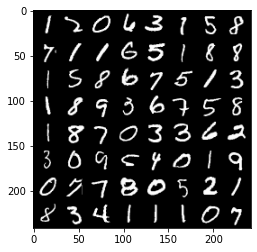

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [20]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

In [21]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

In [22]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[ 0.0594, -0.0286, -0.0322, -0.0290,  0.0233, -0.0751, -0.0027, -0.0973,
         -0.0797, -0.0294],
        [ 0.0706, -0.0246, -0.0278, -0.0111,  0.0247, -0.0526, -0.0224, -0.1196,
         -0.0657, -0.0637],
        [ 0.0561, -0.0182, -0.0114, -0.0248,  0.0259, -0.0508,  0.0049, -0.0767,
         -0.0769, -0.0406],
        [ 0.0400, -0.0133, -0.0014, -0.0250,  0.0201, -0.0426, -0.0008, -0.0475,
         -0.0751, -0.0596],
        [ 0.0624, -0.0238, -0.0104, -0.0292,  0.0310, -0.0462,  0.0045, -0.0833,
         -0.0799, -0.0449],
        [ 0.0540, -0.0196, -0.0203, -0.0199,  0.0099, -0.0609,  0.0022, -0.0793,
         -0.0811, -0.0323],
        [ 0.0523, -0.0216, -0.0161, -0.0262,  0.0353, -0.0567,  0.0138, -0.0692,
         -0.0743, -0.0455],
        [ 0.0538, -0.0114, -0.0192, -0.0245,  0.0304, -0.0529,  0.0144, -0.0727,
         -0.0761, -0.0460],
        [ 0.0420, -0.0174, -0.0045, -0.0297,  0.0092, -0.0721,  0.0235, -0.0637,
         -0.0896, -0.0463],
        [ 0.0507, -

In [23]:
import torch.optim as optim

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [24]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.7265 | Train Accuracy: 76.40
Epoch:  1 | Loss: 0.3106 | Train Accuracy: 91.03
Epoch:  2 | Loss: 0.2192 | Train Accuracy: 93.87
Epoch:  3 | Loss: 0.1843 | Train Accuracy: 94.83
Epoch:  4 | Loss: 0.1677 | Train Accuracy: 95.28
Epoch:  5 | Loss: 0.1491 | Train Accuracy: 95.80
Epoch:  6 | Loss: 0.1338 | Train Accuracy: 96.27
Epoch:  7 | Loss: 0.1285 | Train Accuracy: 96.41
Epoch:  8 | Loss: 0.1252 | Train Accuracy: 96.49
Epoch:  9 | Loss: 0.1195 | Train Accuracy: 96.71


In [25]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.10
